In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 单样本检验
汽车引擎新排放标准是平均值<20ppm，现某公司抽取10台汽车样本，其引擎排放水平为 15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9，判断该公司汽车是否符合新排放标准？

In [4]:
dataset = pd.Series([15.6, 16.2, 22.5, 20.5, 16.4, 19.4, 16.6, 17.9, 12.7, 13.9])

## 描述统计信息
首先查看样本的描述统计信息，包括平均值，标准差等。

In [5]:
#计算样本平均值
sample_mean = dataset.mean()
sample_std = dataset.std()
'''
这里要区别的是数据集的标准差，和样本标准差。
数据集的标准差公式是除以n，样本标准差的公式是除以n-1.
样本标准差的作用是用样本标准差估计总体标准差。
pandas计算的标准差，默认除以的是n-1，也就是计算出样本的标准差。
'''
print('sample_mean', sample_mean)
print('sample_std', sample_std)

sample_mean 17.169999999999998
sample_std 2.9814426038413018


## 定义假设

问题描述：判断该公司汽车引擎是否符合新排放标准

- 零假设：公司引擎排放不满足标准，即平均值>=20
- 备选假设：公司引擎排放满足标准，即平均值<20
- 检验类型：本案例是检验单个样本平均值是否等于目标值，所以是检验类型是单样本检验。
- 抽样分布类型：该样本n=10，不是正态分布，可将数据集可视化判断样本分布类型。

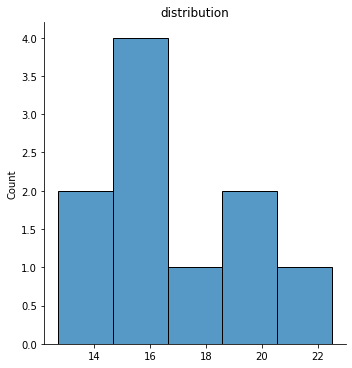

In [9]:
sns.displot(dataset)
plt.title('distribution')
plt.show()

# 从样本的数据集分布可看出，图形近似正态分布，符合t分布。

## 求出指标证据

- 即求出零假设成立时，得到样本平均值的概率p值。
- 有两种方法，一种是手动求得，一种是用python中的stats求得。

In [14]:
# 样本大小
n = len(dataset)
# 标准误差 = 样本标准差 / (n的开方)
std_error = sample_std / np.sqrt(n)
# 总体平均值, 即要求达到的标准20
pop_mean = 20
# t值
t = (sample_mean - pop_mean) / std_error
t

-3.001649525885985

In [17]:
t, p_two_tail = stats.ttest_1samp(dataset, pop_mean)
p_one_tail = p_two_tail / 2
print('t', t)
print('p_one_tail', p_one_tail)
print('p_two_tail', p_two_tail)

t -3.001649525885985
p_one_tail 0.0074582071244487635
p_two_tail 0.014916414248897527


## 判断标准

- 即显著水平`alpha`的取值，一般可取0.1%，1%，5%，视实际情况而定，本案例取显著水平`alpha` = 5%

In [20]:
"""
左尾判断条件：t<0 and p < 判断标准（显著水平）alpha
右尾判断条件：t>0 and p < 判断标准（显著水平）alpha
"""
alpha = 0.05

if t < 0 and p_one_tail < alpha:
    
    print('拒绝零假设，有统计显著，即汽车引擎排放满足新标准')

else:
    print('接受零假设，没有统计显著，即汽车引擎排放不满足新标准')


拒绝零假设，有统计显著，即汽车引擎排放满足新标准


## 置信区间
用来估计总体的均值范围

In [21]:
# 求置信区间
"""
a = 样本平均值 - t_ci * 标准误差
b = 样本平均值 + t_ci * 标准误差
"""
# 查找t表格获取95%置信水平，自由度是n-1对应的t值
t_ci = 0.0645
# 计算标准误差
se = stats.sem(dataset)
a = sample_mean - t_ci * se
b = sample_mean + t_ci * se

print('单个样本平均值的置信区间 CI =', [a, b])


单个样本平均值的置信区间 CI = [17.109188436749246, 17.23081156325075]


## 效应量

量化显著差异，即得出差异大小，使做出的决策更具目的性。

### 差异指标

In [23]:
"""
效应量 Cohen's d
"""
d = (sample_mean - pop_mean) / sample_std
print(abs(d))
# 效果显著（差异大）

0.9492049239364257


### 相关度指标